In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("MNIST_dataset/train.csv")

In [4]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [37]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape

In [58]:
def init_params():
    W1 = np.random.randn(128, 784) * 0.01
    b1 = np.zeros((128, 1))
    W2 = np.random.randn(10, 128) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(x):
    return np.maximum(0, x)

def softmax(Z):
    shifted = Z - np.max(Z, axis=0, keepdims=True)
    expZ = np.exp(shifted)
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [59]:
def one_hot(Y):
    one_hot_Y = np.zeros((10, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def deriv_ReLU(x):
    return x > 0

def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / Y.size * dZ2.dot(A1.T)
    db2 = 1 / Y.size * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)

    dW1 = 1 / Y.size * dZ1.dot(X.T)
    db1 = 1 / Y.size * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

In [63]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration number: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]

    print("Prediction:", prediction)
    print("Label:", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [67]:
 W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1502, 0.01)

Iteration number:  0
W1 mean: 0.007997212217761436
Accuracy:  0.1435609756097561
Iteration number:  100
W1 mean: 0.008003630473545796
Accuracy:  0.5365853658536586
Iteration number:  200
W1 mean: 0.008024660862477544
Accuracy:  0.6461707317073171
Iteration number:  300
W1 mean: 0.008074131709878524
Accuracy:  0.6532682926829269
Iteration number:  400
W1 mean: 0.0081765204103782
Accuracy:  0.6486341463414634
Iteration number:  500
W1 mean: 0.008359414524689619
Accuracy:  0.6768536585365854
Iteration number:  600
W1 mean: 0.00862279631733926
Accuracy:  0.702170731707317
Iteration number:  700
W1 mean: 0.008930273922131525
Accuracy:  0.7182682926829268
Iteration number:  800
W1 mean: 0.009238013428523914
Accuracy:  0.7495853658536585
Iteration number:  900
W1 mean: 0.009520754262613207
Accuracy:  0.7777073170731708
Iteration number:  1000
W1 mean: 0.009771387260696353
Accuracy:  0.7973414634146342
Iteration number:  1100
W1 mean: 0.009992644312260884
Accuracy:  0.8129512195121951
Iteratio

Prediction:  [4]
Label:  4


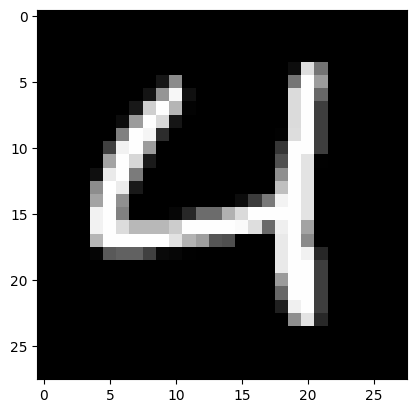

In [69]:
test_prediction(8, W1, b1, W2, b2)

In [70]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

np.float64(0.846)